# About this notebook

In this notebook, I will explore the iPhone 14 tweet data that available on Kaggle with the help of matplotlib and seaborn to visualize the results for a better view. I will also do a simple sentiment analysis using NLTK and [vaderSentiment](https://github.com/cjhutto/vaderSentiment). I used vaderSentiment because it's specifically attuned to sentiments expressed in social media.

# About dataset

The dataset could be viewed on Kaggle titled [iPhone 14 Tweets [July/Sept 2022 +144k English]](https://www.kaggle.com/datasets/tleonel/iphone14-tweets).

On 7 September 2022, Apple release a teaser of its newest phone series, iPhone 14 series, and its gain a ton of reaction from the internet. To analyze the sentiment of public, I will use this data and observe its sentiment using NLP. 

The column's and other further description could be viewed in the kaggle page. 

### Import libraries

In [62]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import word_tokenize
from nltk.corpus import stopwords

### Load and view dataset

In [2]:
df = pd.read_csv('data/iphone14-query-tweets.csv')

In [3]:
df.head(5)

,date_time,username,user_location,user_description,verified,followers_count,following_count,tweet_like_count,tweet_retweet_count,tweet_reply_count,source,tweet_text
0,2022-09-03 15:14:43+00:00,ManoranjanNews1,delhi,We provide all entertainment news in your lang...,False,10,70,0,0,0,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",iPhone 14 Professional Alleged Reside Video Su...
1,2022-09-03 15:14:34+00:00,blithe_peg,NaN,üì¢ÁîµÊä•Áæ§‚úàt.me/+eem5LAA9SeBmM‚Ä¶ üéâ...,False,0,0,0,0,0,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",üëà‰∏ªÈ°µ‰∏ªÈ°µ This trick lets you visualize...
2,2022-09-03 15:14:08+00:00,brainy_maxx,Naija,"I‚Äôm mindin' my business, God is my witness ...",False,2305,2096,0,0,1,"<a href=""http://twitter.com/download/iphone"" r...",@thebams_dele Iphone 14 pro max uk used
3,2022-09-03 15:13:08+00:00,MacHashNews,Designed in California,Up to the minute Apple news. The best Mac and ...,False,1915,3670,0,0,0,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",Video Claiming iPhone 14 Pro Users Will Be Abl...
4,2022-09-03 15:12:33+00:00,Not_Javian,NaN,Somewhere working for success. #GoalDriven,False,571,625,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",New iPhone 14 Pro is gonna look so sick can't ...


In [4]:
df.shape

(66794, 12)

So we have 66.749 rows of data with 12 columns.

In [5]:
df.describe()

,followers_count,following_count,tweet_like_count,tweet_retweet_count,tweet_reply_count
count,6.679400e+04,66794.000000,66794.000000,66794.000000,66794.000000
mean,4.140289e+04,1063.227401,17.437090,2.383642,1.124577
std,6.377623e+05,4574.256852,287.039873,38.472064,14.760980
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.100000e+01,29.000000,0.000000,0.000000,0.000000
50%,1.930000e+02,180.000000,0.000000,0.000000,0.000000
75%,1.307000e+03,749.750000,1.000000,0.000000,0.000000
max,5.969826e+07,280962.000000,28162.000000,4404.000000,1352.000000


The description above shows the statistics of some of the data's features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66794 entries, 0 to 66793
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_time            66794 non-null  object
 1   username             66794 non-null  object
 2   user_location        43292 non-null  object
 3   user_description     58356 non-null  object
 4   verified             66794 non-null  bool  
 5   followers_count      66794 non-null  int64 
 6   following_count      66794 non-null  int64 
 7   tweet_like_count     66794 non-null  int64 
 8   tweet_retweet_count  66794 non-null  int64 
 9   tweet_reply_count    66794 non-null  int64 
 10  source               66794 non-null  object
 11  tweet_text           66794 non-null  object
dtypes: bool(1), int64(5), object(6)
memory usage: 5.7+ MB


As we could see, the description above shows the datatype and the number of null value on each columns. Turn out, there are multiple null value on the user_location and user_description column. Because there the user's location and description are not essential for the data exploration, I will not replace or delete the data that contain those said values.

## Exploratory Data Analysis

### Date

In [7]:
df.date_time.head(1), df.date_time.tail(1)

(0    2022-09-03 15:14:43+00:00
 Name: date_time, dtype: object,
 66793    2022-07-11 16:02:51+00:00
 Name: date_time, dtype: object)

The tweets data are gathered from July 11th, 2022 until September 3rd, 2022.

In [8]:
def to_date(dates):
    return pd.to_datetime(dates.split(' ')[0], format='%Y-%m-%d')

df['date'] = df.apply(lambda x: to_date(x['date_time']), axis=1)

In [9]:
monthly = df.date.dt.to_period('M')

data = df.groupby(monthly)

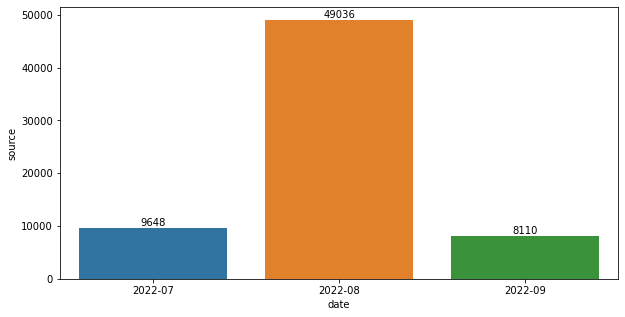

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=data.count(), x=data.count().date.index, y='source')
ax.bar_label(ax.containers[0])
plt.show()

Above are the number of tweet from each month observed. Most of the tweet are from August 2022.

In [11]:
daily = df.date.dt.to_period('D')

data = df.groupby(daily)

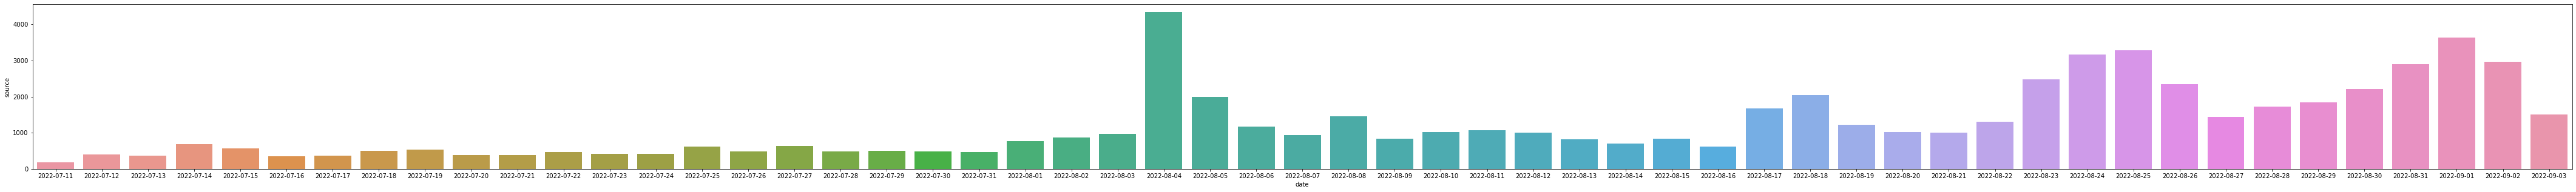

In [14]:
f, ax = plt.subplots(figsize=(75,5))
sns.barplot(data=data.count(), x=data.count().date.index, y='source')
plt.show()

Meanwhile, from the chart above, we could see that August 4th has the most tweet data that contain words iphone 14.

### User Account

#### Verified account

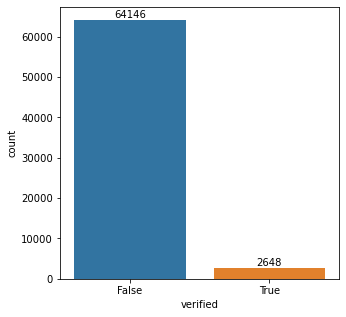

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data=df, x='verified')
ax.bar_label(ax.containers[0])
plt.show()

There are mostly unverified account in the dataset.

#### Followers count

First, let's see the maximum and minimum followers count in the dataset.

In [16]:
max(df['followers_count']), min(df['followers_count'])

(59698256, 0)

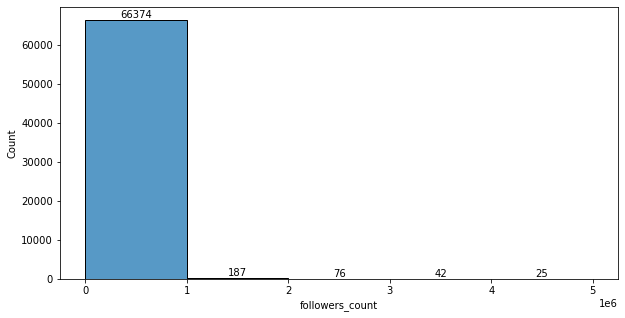

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['followers_count'], bins=np.arange(0, 6000000, 1000000))
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(0, 6000000, 1000000))
plt.show()

The histogram above shows that majority of the account that tweet about iphone 14 have less than a million folowers (66374 tweets).

Let's see how many tweet's account that has less than 100.000 followers in the histogram below.

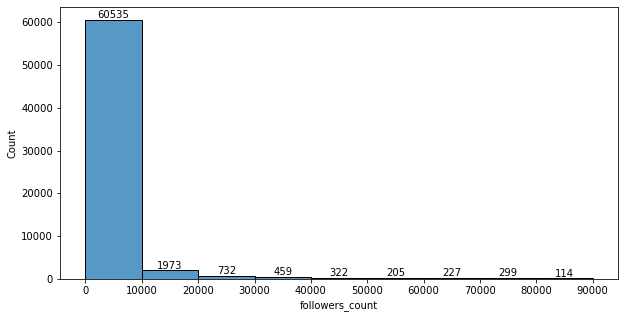

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['followers_count'], bins=np.arange(0, 100000, 10000))
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(0, 100000, 10000))
plt.show()

It shows that most of the account (60535) have 10.000 followers or less.

#### Following count

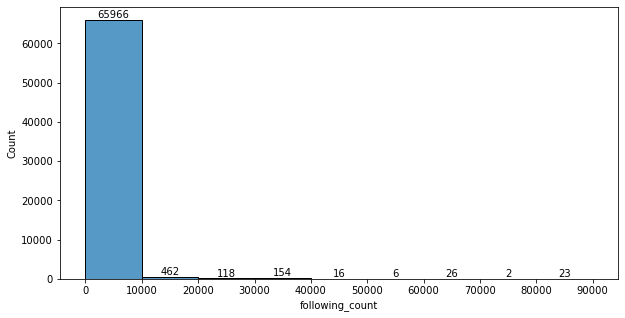

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['following_count'], bins=np.arange(0, 100000, 10000))
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(0, 100000, 10000))
plt.show()

Meanwhile, most of the tweitter accounts on the dataset has less than 10000 following count.

### Tweet

In this section, we will look closer at the tweet's analytics (like, retweet and replies).

#### Tweet like

In [20]:
max(df['tweet_like_count']), min(df['tweet_like_count'])

(28162, 0)

<AxesSubplot:ylabel='tweet_like_count'>

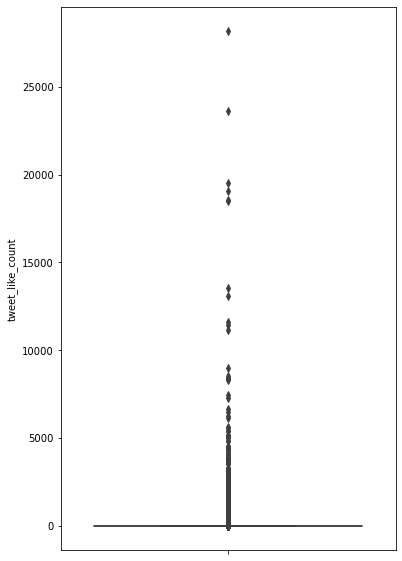

In [21]:
fig, ax = plt.subplots(figsize=(6, 10))
sns.boxplot(y=df['tweet_like_count'])

The tweet like count in the dataset varied from 0 to 28162. Let's see in detail the tweet like count that less than 10000 likes.

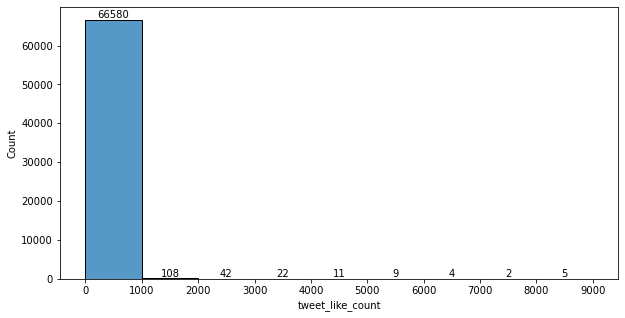

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['tweet_like_count'], bins=np.arange(0, 10000, 1000))
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(0, 10000, 1000))
plt.show()

Turns out, the majority of the tweet has less than 1000 likes (66580 tweets).

#### Tweet retweet

In [23]:
max(df['tweet_retweet_count']), min(df['tweet_retweet_count'])

(4404, 0)

<AxesSubplot:ylabel='tweet_retweet_count'>

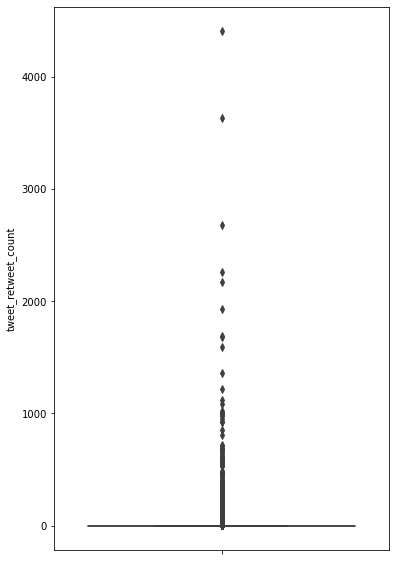

In [24]:
fig, ax = plt.subplots(figsize=(6, 10))
sns.boxplot(y=df['tweet_retweet_count'])

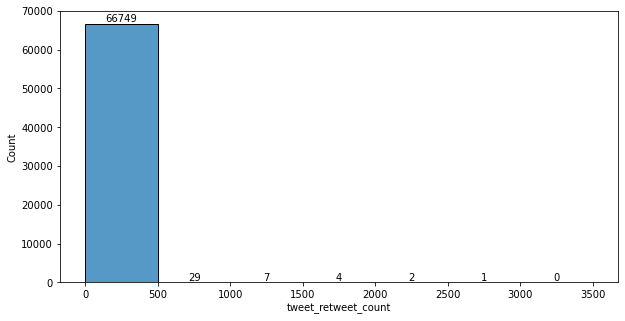

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['tweet_retweet_count'], bins=np.arange(0, 4000, 500))
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(0, 4000, 500))
plt.show()

As we can see in the histogram above, most of the tweets have less than 500 retweet count (66749 tweets).

#### Tweet replies

In [26]:
max(df['tweet_reply_count']), min(df['tweet_reply_count'])

(1352, 0)

<AxesSubplot:ylabel='tweet_reply_count'>

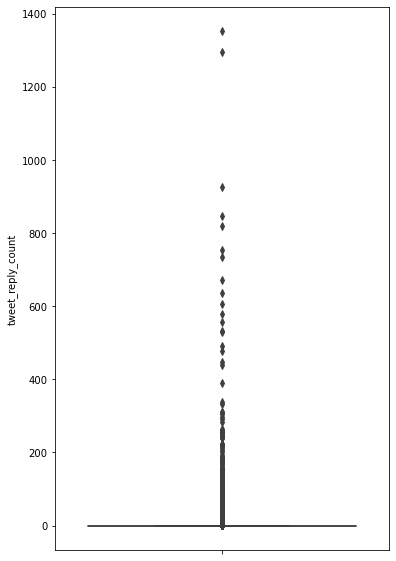

In [27]:
fig, ax = plt.subplots(figsize=(6, 10))
sns.boxplot(y=df['tweet_reply_count'])

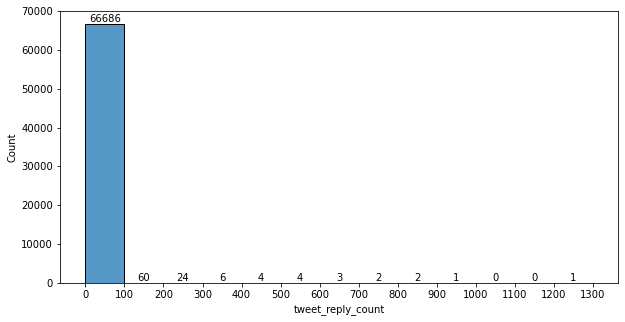

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['tweet_reply_count'], bins=np.arange(0, 1400, 100))
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(0, 1400, 100))
plt.show()

Meanwhile, for the replies count, majority of the tweets have 100 replies or less.

### Tweet text

In this section, we will analyze the tweet's text in the dataset.

In [29]:
df.tweet_text

0        iPhone 14 Professional Alleged Reside Video Su...
1        üëà‰∏ªÈ°µ‰∏ªÈ°µ This trick lets you visualize...
2                  @thebams_dele Iphone 14 pro max uk used
3        Video Claiming iPhone 14 Pro Users Will Be Abl...
4        New iPhone 14 Pro is gonna look so sick can't ...
                               ...                        
66789    iPhone 14 ENTIRE Lineup Early Look - https://t...
66790    iPhone 14 strength will battle weak consumer s...
66791    @robertrosenfeld My Pixel 4's battery, never t...
66792    i don‚Äôt understand people who buy every new ...
66793    iPhone 14 Series Could Cost $100 Higher Than i...
Name: tweet_text, Length: 66794, dtype: object

Below, we will do preprocessing to the tweet's text by removing link, mention to other account, and punctuation.

In [30]:
def preprocess_tweet(tweet):
    tweet = re.sub('https?://\S+|www\.\S+', ' ', tweet)
    tweet = re.sub('\@.*?\s', ' ', tweet)
    tweet = re.sub('[^a-zA-Z\d\s\$]', ' ', tweet)
    tweet = re.sub('\s+', ' ', tweet)
    tweet = ' '.join([x.lower() for x in tweet.split(' ')])
    return tweet

In [31]:
df['clean_tweet_text'] = df.apply(lambda x: preprocess_tweet(x.tweet_text), axis=1)

In [32]:
df['clean_tweet_text']

0        iphone 14 professional alleged reside video su...
1         this trick lets you visualize the new iphone ...
2                                iphone 14 pro max uk used
3        video claiming iphone 14 pro users will be abl...
4        new iphone 14 pro is gonna look so sick can t ...
                               ...                        
66789                  iphone 14 entire lineup early look 
66790    iphone 14 strength will battle weak consumer s...
66791     my pixel 4 s battery never that great is on i...
66792    i don t understand people who buy every new ip...
66793    iphone 14 series could cost $100 higher than i...
Name: clean_tweet_text, Length: 66794, dtype: object

Next, we will analyze the number of words in the tweets data.

In [33]:
def num_of_words(tweet):
    return len([x for x in tweet.split()])

In [34]:
df['num_of_words'] = df.apply(lambda x: num_of_words(x['clean_tweet_text']), axis=1)

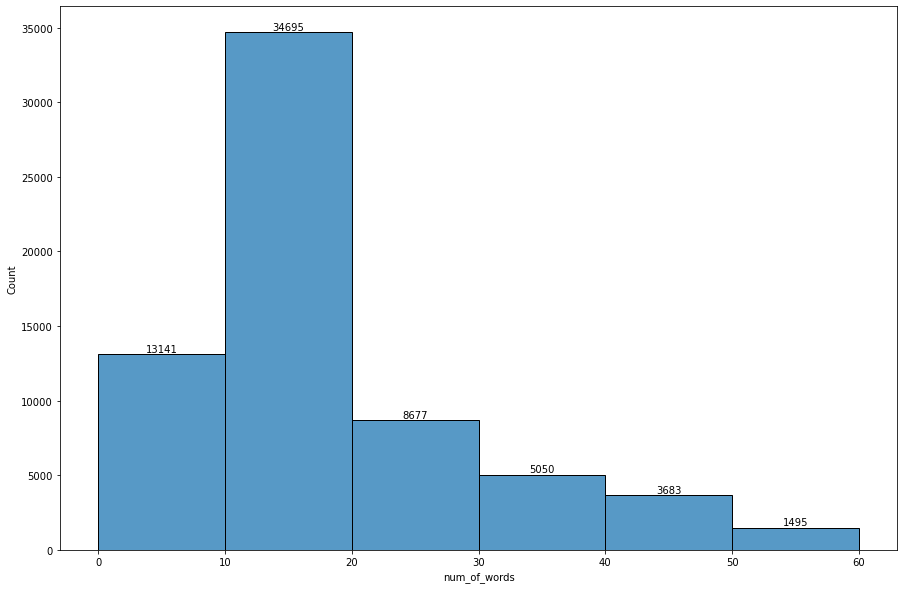

In [35]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['num_of_words'], bins=np.arange(0, 70, 10))
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(0, 70, 10))
plt.show()

The graph above shows that majority of the tweet data contain 10 to 20 words.

## Sentiment Analysis

First let's preprocess the tweet data using the help of NLTK. In the preprocess stage, we will tokenize the tweet using word_tokenize from NLTK, and then remove the stopwords that provided by NLTK English's stopwords.

In [36]:
sw = set(stopwords.words('english'))

In [37]:
# take the clean tweet in the dataset
tweets = df.clean_tweet_text

In [38]:
# tokenize the tweet text using NLTK
tknz_tweets = [word_tokenize(w) for w in tweets]

In [39]:
# remove the words that are on NLTK stopwords
sw_tweets = []
for tweet in tknz_tweets:
    tweet = ' '.join([t for t in tweet if t not in sw])
    sw_tweets.append(tweet)

Then, we will collect the sentiment for each tweet using vaderSentiment and store it into another dataframe.

vaderSentiment will return four different scores for the sentence that being checked, which are pos, compound, neu, and neg. In order to see the sentiment of the text, we will only view the compound score as the threshold values. Based on vaderSentiment's documentation:

- compound score >=0.05 means that the text has positive sentiment 
- compound score between -0.05 and 0.05 means neutral sentiment
- compound score <=-0.05 means the text has negative sentiment.

In [40]:
# create the vaderSentiment's SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

In [41]:
analyzed_tweet = dict()
idx = 0

for t in sw_tweets:
    # analyze the polarity scores of the text
    cp = analyzer.polarity_scores(t)['compound']
    
    # label the text based on its compound score
    if cp >= 0.05:
        sentiment = 'pos'
    elif cp <0.05 and cp > -0.05:
        sentiment = 'neu'
    else:
        sentiment = 'neg'
        
    # store the result
    analyzed_tweet[idx] = {'text': df['tweet_text'][idx],
                           'clean_text': t,
                            'compound': cp,
                            'sentiment': sentiment}
    idx+=1

In [42]:
# create dataframe based on the analyzed tweet result
df_tweet = pd.DataFrame(analyzed_tweet).transpose()

In [43]:
df_tweet.head(5)

,text,clean_text,compound,sentiment
0,iPhone 14 Professional Alleged Reside Video Su...,iphone 14 professional alleged reside video su...,0.3818,pos
1,üëà‰∏ªÈ°µ‰∏ªÈ°µ This trick lets you visualize...,trick lets visualize new iphone 14 cutout ipho...,-0.1027,neg
2,@thebams_dele Iphone 14 pro max uk used,iphone 14 pro max uk used,0.0,neu
3,Video Claiming iPhone 14 Pro Users Will Be Abl...,video claiming iphone 14 pro users able custom...,0.4215,pos
4,New iPhone 14 Pro is gonna look so sick can't ...,new iphone 14 pro gon na look sick wait apple ...,-0.5106,neg


Let's view the sample of each sentiment.

In [44]:
pd.set_option('display.max_colwidth', None)

In [45]:
# view positive tweets
pos = df_tweet[df_tweet.sentiment=='pos']

In [59]:
pos.sort_values(by='compound', ascending=False)[:5]

,text,clean_text,compound,sentiment
48558,hope y'all ready üíñüéâ\nSunday is few days from now üòãüéâ\n\nBig wiz l #poweredbydata l #obidiots l iPhone 14 l #StayingAlive l Mr Bayo l #ashawo l Fireboy l IT IS DONE l NBA YoungBoy l warstart l ASUU,hope ready sunday days big wiz l poweredbydata l obidiots l iphone 14 l stayingalive l mr bayo l ashawo l fireboy l done l nba youngboy l warstart l asuu,0.9886,pos
51754,"Today we celebrate a sweetheart @ivy_buttercup. Only the most beautiful things are said about you, we love how you genuinely care about all of us &amp; we are grateful for the gift of you. May God grant the innermost yearnings of your heart.\n#influenceculture #mingle iphone 14 ASUU https://t.co/bnrGI1D6xW",today celebrate sweetheart beautiful things said love genuinely care us amp grateful gift may god grant innermost yearnings heart influenceculture mingle iphone 14 asuu,0.9872,pos
36377,@joscarp123 @Jasont7T Iphone 14 coming soon so wait lol thought I would bever say that to you about your iphone ! lol congrats on locking in gains you are so consistent each day it's so amazing! Wonderful work ! and part time lol! congrats! https://t.co/hzkNwlWx7J,iphone 14 coming soon wait lol thought would bever say iphone lol congrats locking gains consistent day amazing wonderful work part time lol congrats,0.9753,pos
60178,"Congratulation!\nWith a total order price over $500,000Ôºådear customer from Bangladesh, WON an Iphone 14 during the activity. \nMany thanks to all my esteemed clients for your tremendous support, so we have prepared this Gratitude Reward. https://t.co/GyNNgmj0CO",congratulation total order price $ 500 000 dear customer bangladesh iphone 14 activity many thanks esteemed clients tremendous support prepared gratitude reward,0.9743,pos
64595,"Do I wanna fall in love? Heck yeah. Am I afraid? I can‚Äôt say I‚Äôm not. Am I to close my heart? Not really, no. Am I to open my heart like wide open like ‚Äúcome on in, girls. Yea get your free iPhone 14 Pro Max‚Äù? Not anymore.",wan na fall love heck yeah afraid say close heart really open heart like wide open like come girls yea get free iphone 14 pro max anymore,0.974,pos


In [53]:
# view neutral tweets
neu = df_tweet[df_tweet.sentiment=='neu']

In [60]:
neu.sort_values(by='compound', ascending=False)[:5]

,text,clean_text,compound,sentiment
14594,Ima be so upset if this iPhone 14 really look like the 13 Bc i still got the 12 . üôÑ,ima upset iphone 14 really look like 13 bc still got 12,0.046,neu
2947,"@iam_tech Looking forward to the iphone 14 but nothing wrong with his comparison. Those specs have been leaked and 99% will be accurate. Innovation has never been apples strong suit, they copy others. But ios and ipad os getting major updates is something to look forward to.",looking forward iphone 14 nothing wrong comparison specs leaked 99 accurate innovation never apples strong suit copy others ios ipad os getting major updates something look forward,0.0392,neu
51749,"You will never be good enough to the wrong the person, so be your self. \n\n#BBNaija Nigerien iPhone 14 Deborah IPPIS TG Omori ASUU #BB24",never good enough wrong person self bbnaija nigerien iphone 14 deborah ippis tg omori asuu bb24,0.0382,neu
41559,Would you still buy iPhone 14 Pro despite rumored price increase? =&gt; https://t.co/wwHoP8z7Xv,would still buy iphone 14 pro despite rumored price increase gt,0.0356,neu
26574,"#apple #tech #mac - iPhone 14 to spur more upgrades than iPhone 13 despite price increase, survey suggests - https://t.co/uzYki6bhjb -&gt; @Davidjcc_Zgz https://t.co/XlzflQPUIr",apple tech mac iphone 14 spur upgrades iphone 13 despite price increase survey suggests gt,0.0356,neu


In [55]:
# view negative tweets
neg = df_tweet[df_tweet.sentiment=='neg']

In [61]:
neg.sort_values(by='compound', ascending=True)[:5]

,text,clean_text,compound,sentiment
11519,i hate hate hate that i got the iphone 13 bc a bitch is about to drop MONEY on this orange iphone 14 holy shit shit shit,hate hate hate got iphone 13 bc bitch drop money orange iphone 14 holy shit shit shit,-0.9814,neg
53142,"Breaking court sentences iniubong umoren killer to death by hangings ,uduak frank akpan has been sent to death by hangings for rape and murder..\nThis breaks my heart üíîüíî tho\n\nEFCC mompha japa oshiomole iPhone 14 God abeg New born fela #AtikuOkowa2023 Abacha ASUU Cynthia okereke https://t.co/RAr5I51ONF",breaking court sentences iniubong umoren killer death hangings uduak frank akpan sent death hangings rape murder breaks heart tho efcc mompha japa oshiomole iphone 14 god abeg new born fela atikuokowa2023 abacha asuu cynthia okereke,-0.9517,neg
22110,"Apple to Launch iPhone 14 on September 7 The invasion of Taiwan, millions of Uyghurs persecuted, imprisoned, killed, the cruel treatment of Chinese citizens by Xi and his CCP! White, black, Hispanic,Asian Americans are feeding this very dangerous beast! https://t.co/NDMCIpNNji",apple launch iphone 14 september 7 invasion taiwan millions uyghurs persecuted imprisoned killed cruel treatment chinese citizens xi ccp white black hispanic asian americans feeding dangerous beast,-0.9493,neg
56302,harryimagine harry styles jumps off stage middle of concert smirks gift get jealous stab brand new iphone gold spike oh no did not mean to you most beautiful girl in world smirk disappeared dead pass away wattpad dramatic kill 14 1 one direction 1d meme mom sell you to y/n murder https://t.co/Wx5SPJbsdZ,harryimagine harry styles jumps stage middle concert smirks gift get jealous stab brand new iphone gold spike oh mean beautiful girl world smirk disappeared dead pass away wattpad dramatic kill 14 1 one direction 1d meme mom sell n murder,-0.9485,neg
35745,JUST TELL ME WHEN THE FUCK YOU GUYS WOULD LAUCH A PINK PRO MAX?!!!!!!!!??????I‚ÄôVE BEEN WAITING FROM IPHONE11 TO IPHONE 14!!!!NOTHING COMES!!!!!U FUCKING IDIOT ONLY KNOWS TO LANUCH THAT PURPLE GREEN BLUE SHIT!!!LOOK LIKES SHIT!GARBAGE!!!FUCKING UGLY!!!@Apple https://t.co/jNiyED7rmC,tell fuck guys would lauch pink pro max waiting iphone11 iphone 14 nothing comes u fucking idiot knows lanuch purple green blue shit look likes shit garbage fucking ugly,-0.944,neg


Finally, let's see the number of tweets for each sentiment in the dataset.

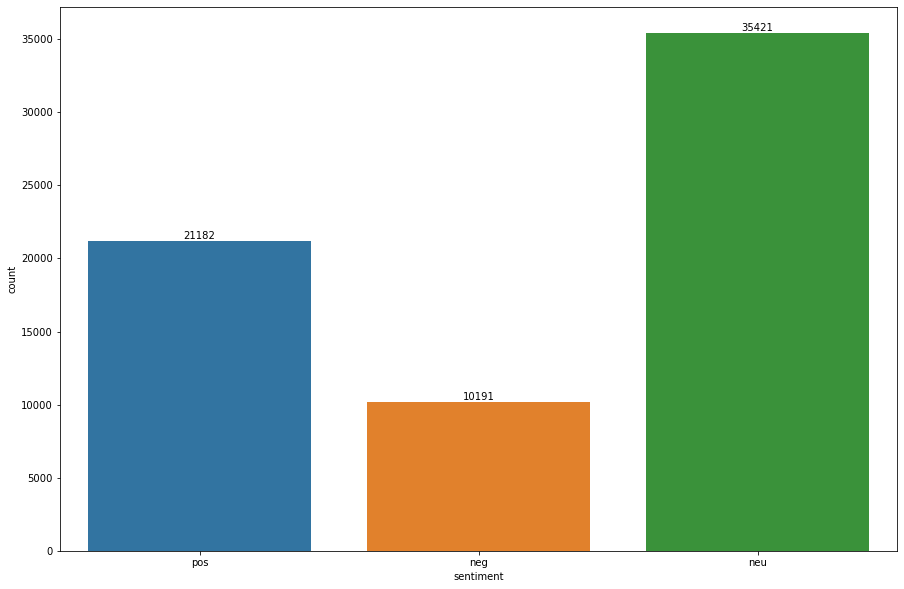

In [57]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df_tweet, x='sentiment')
ax.bar_label(ax.containers[0])
plt.show()

The graph above shows that the majority of the tweets in the dataset have neutral opinion about iPhone 14 (36.577 tweets), followed by positive sentiment (20.320 tweets) and negative sentiment (9.897 tweets).